<a href="https://colab.research.google.com/github/SisiDzy/Machine-Learning/blob/main/ML_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### First, import the red wine csv file into a pandas dataframe from the following website: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv (Note: you need to adjust the argument for read_csv() from sep=',' to sep=';')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Then, use the wine quality data set to answer the following questions. Present any figures that assist you in your analysis:

### 1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

# Scale the wine quality data
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


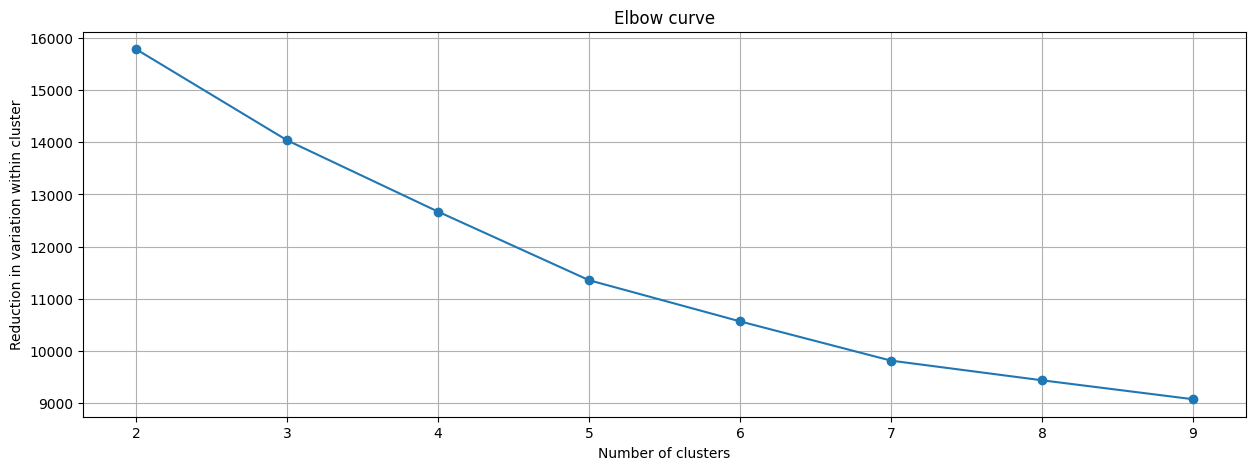

In [ ]:
# Use the elbow curve to evaluate k in kmeans

within_cluster_variance = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=20)
    kmeans.fit(X)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in variation within cluster')
plt.title('Elbow curve')
plt.show()

For the elbow curve, we can see that there is no obvious elbow to choose k.

Under this condition, I am going to use the silhouette score to evaluate k in kmeans.

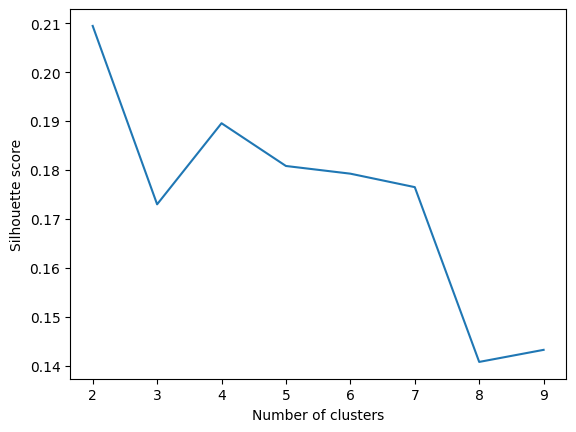

In [ ]:
from sklearn.metrics import silhouette_score

min_clusters = 2
max_clusters = 10
silhouette_scores = []

for k in range(min_clusters, max_clusters):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=20)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

x_values = np.arange(2, 2 + len(silhouette_scores))
plt.plot(x_values, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

From the above graph, we can see that when the number of clusters is 2, the silhouette score is highest. But comparing to the elbow curve and considering that we have to compare higher values and lower values of wine quality later, I choose to use 4 clusters that have the second highest silhouette score.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=20)
X['cluster'] = kmeans.fit_predict(X)
cluster_summary = X.groupby('cluster').mean()
display(cluster_summary)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.648272,0.510769,-0.798961,-0.231000,-0.168651,-0.245627,-0.366969,-0.431337,0.615261,-0.308842,0.028779,-0.154331
1,-0.055320,0.033160,0.116850,0.362771,-0.001231,0.995575,1.253767,0.313849,-0.170510,-0.186485,-0.556109,-0.454576
2,0.991436,-0.777075,1.006605,0.062231,-0.091054,-0.458975,-0.527034,0.363181,-0.660166,0.392220,0.468163,0.622237
3,0.095416,0.002200,1.181553,-0.389872,5.784760,-0.049516,0.510330,0.180072,-1.735792,3.663412,-0.869731,-0.345440


In [ ]:
high_quality_cluster = cluster_summary[cluster_summary['quality'] == cluster_summary['quality'].max()]
display(high_quality_cluster)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
2,0.991436,-0.777075,1.006605,0.062231,-0.091054,-0.458975,-0.527034,0.363181,-0.660166,0.39222,0.468163,0.622237


In [ ]:
low_quality_cluster = cluster_summary[cluster_summary['quality'] == cluster_summary['quality'].min()]
display(low_quality_cluster)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
1,-0.05532,0.03316,0.11685,0.362771,-0.001231,0.995575,1.253767,0.313849,-0.17051,-0.186485,-0.556109,-0.454576


### Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

From the above tables, we can see that cluster 2 has a higher value of wine quality, and cluster 1 has a lower value of wine quality.

Higher wine quality seems to associate with
higher values of fixed acidity, citric acid, density, sulphates, and alcohol, and lower values of volatile acidity, residual sugar, chlorides, free and total sulfur dioxide, and pH.

In the same way, lower wine quality seems to associate with
lower values of fixed acidity, citric acid, density, sulphates, and alcohol, and higher values of volatile acidity, residual sugar, chlorides, free and total sulfur dioxide, and pH.

### If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?

According to the above tables, variables with a relatively higher variance between the two clusters are: fixed acidity, citric acid, free and total sulfur dioxide, and alcohol.

Therefore, if I want to make a good bottle of wine, it is important to have a higher fixed acidity, higher citric acid, lower free and total sulfur dioxide, and higher alcohol.

### 2. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage

ac = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')
X['cluster'] = ac.fit_predict(X)
cluster_summary = X.groupby('cluster').mean()
display(cluster_summary)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,0.204167,-0.681479,0.850831,7.226880,0.521427,1.781131,2.157482,1.452231,-0.849519,-0.107102,-0.389220,0.141181
1,0.715850,-0.339149,0.669052,0.015968,0.230864,-0.209230,0.032558,0.556612,-0.613509,0.191613,-0.227265,0.030485
2,-0.517579,0.253509,-0.498966,-0.105636,-0.196912,0.126417,-0.052187,-0.420825,0.458002,-0.148833,0.170573,-0.020706
3,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158


In [ ]:
high_quality_cluster = cluster_summary[cluster_summary['quality'] == cluster_summary['quality'].max()]
display(high_quality_cluster)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,0.204167,-0.681479,0.850831,7.22688,0.521427,1.781131,2.157482,1.452231,-0.849519,-0.107102,-0.38922,0.141181


In [ ]:
low_quality_cluster = cluster_summary[cluster_summary['quality'] == cluster_summary['quality'].min()]
display(low_quality_cluster)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
3,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.77028,-2.663717,5.735193,-0.960246,-1.407158


### Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

From the above tables, we can see that cluster 0 has a higher value of wine quality, and cluster 3 has a lower value of wine quality.

Higher wine quality seems to associate with higher values of fixed acidity, residual sugar, free and total sulfur dioxide, density, pH, and alcohol, and lower values of volatile acidity, citric acid, chlorides, and sulphates.

In the same way, lower wine quality seems to associate with lower values of fixed acidity, residual sugar, free and total sulfur dioxide, density, pH, and alcohol, and higher values of volatile acidity, citric acid, chlorides, and sulphates.

### If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

According to the above tables, variables with a relatively higher variance between the two clusters are: citric acid, residual sugar, chlorides, free and total sulfur dioxide, pH, and sulphates.

Therefore, if I want to make a good bottle of wine, it is important to have a lower citric acid, higher residual sugar, lower chlorides, higher free and total sulfur dioxide, higher pH, and lower sulphates.

The conclusion of hierarchical clustering has changed but is not that different from that of k means clustering.

### 3. Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components. How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cum_explained_variance_ratio = np.cumsum(explained_variance_ratio)

print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance Ratio:", cum_explained_variance_ratio)

Explained Variance Ratio: [0.2641934  0.18304742]
Cumulative Explained Variance Ratio: [0.2641934  0.44724082]


44.69% of the variation in the red wine data is explained by the first two principal components.

To do supervised learning on other variables tied to wine such as wine price, I will use the first two principal components as Xs and the targeted variable as y, split the data into training and testing sets, choose an appropriate supervised learning model (Continuous variables: Linear Regression, Support Vector Machines; Categorical variables: Logistic Regression, Random Forests), train the model, tune parameters, and make predictions.